<a href="https://colab.research.google.com/github/mckang6113875/AP_Test_OPEN/blob/main/FishEye_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/mckang6113875/AP_Test_OPEN.git

Cloning into 'AP_Test_OPEN'...
remote: Enumerating objects: 335, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 335 (delta 6), reused 0 (delta 0), pack-reused 322
Receiving objects: 100% (335/335), 197.14 MiB | 27.04 MiB/s, done.
Resolving deltas: 100% (208/208), done.


(944, 1280, 3)


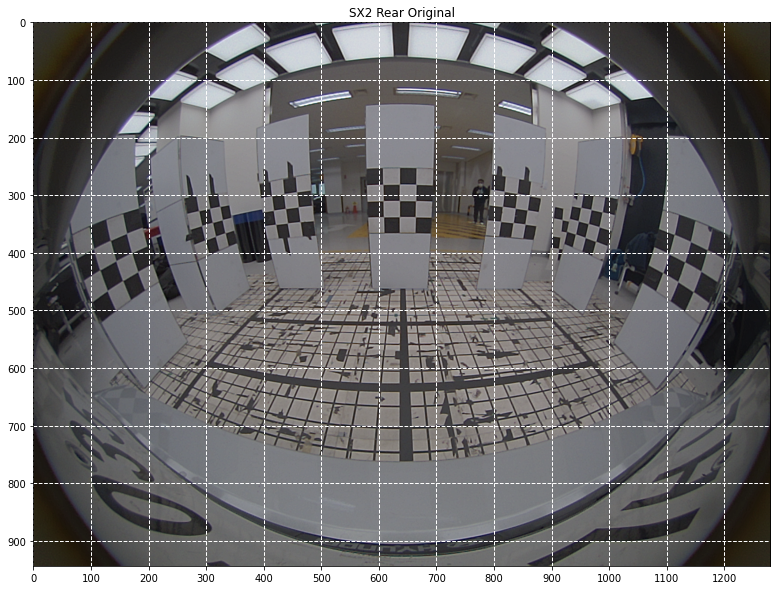

In [274]:
import cv2
import matplotlib.pyplot as plt
original = cv2.imread('/content/AP_Test_OPEN/ViewMode_R.bmp')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
#img = cv2.imread('/content/AP_Test_OPEN/ViewMode_R.bmp')
img = cv2.imread('/content/AP_Test_OPEN/ViewMode_R_fisheye.bmp')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.title('SX2 Rear Original')
plt.grid(color='white', linestyle='--', linewidth=1)
plt.xticks(np.arange(0, img.shape[1], 100));
plt.yticks(np.arange(0, img.shape[0], 100));
print(img.shape)

In [275]:
#import cv2
#import matplotlib.pyplot as plt
#img = cv2.imread('/content/AP_Test_OPEN/ChessBoard_3.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#origin = cv2.imread('/content/AP_Test_OPEN/ChessBoard_3.jpg')
#origin = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
#plt.imshow(img);

True


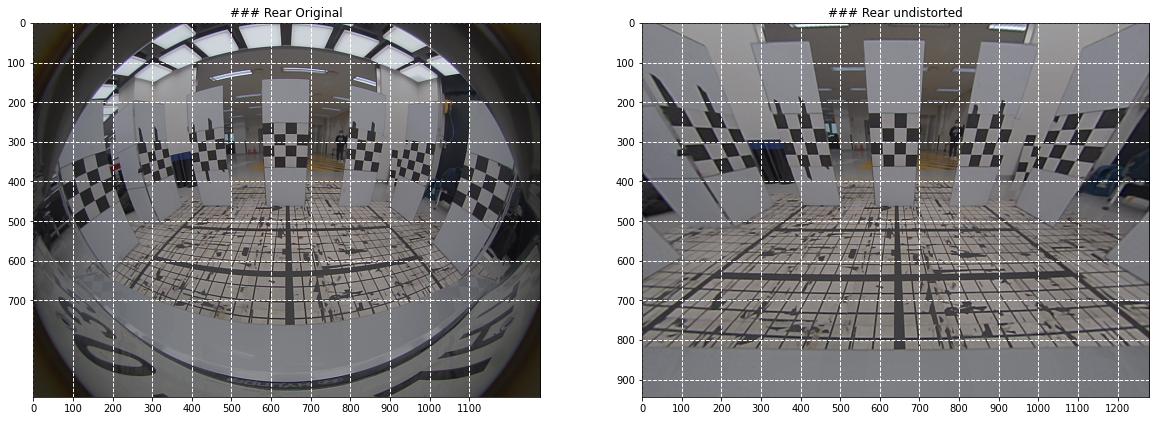

In [279]:
import numpy as np
import cv2

epsilon = 1
epsilon_ = 1 #epsilon
r_c = 30

# Checkboard dimensions
#CHECKERBOARD = (6,9)
CHECKERBOARD = (3,3)
subpix_criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, r_c, epsilon)
#calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_CHECK_COND + cv2.fisheye.CALIB_FIX_SKEW
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC + cv2.fisheye.CALIB_FIX_SKEW
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)

objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

### read images and for each image:
#####img = cv2.imread(fname)
#img = cv2.imread('/content/AP_Test_OPEN/ChessBoard_3.jpg')
#img = cv2.imread('/content/AP_Test_OPEN/ViewMode_R.bmp')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_shape = img.shape[:2]

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)
    cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),subpix_criteria)
    imgpoints.append(corners)
###
print(ret)
# calculate K & D
#####N_imm = # number of calibration images
N_imm = 1 # number of calibration images
K = np.zeros((3, 3))
D = np.zeros((4, 1))
rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_imm)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_imm)]
#print(rvecs), print(tvecs)
###############################################################################
retval, K, D, rvecs, tvecs = cv2.fisheye.calibrate(
    objpoints,
    imgpoints,
    gray.shape[::-1],
    K,
    D,
    rvecs,
    tvecs,
    calibration_flags,
    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, r_c, epsilon_)
    )
#print(K), print(D)
#img = # your image to undistort
#img = cv2.imread('/content/AP_Test_OPEN/ChessBoard_3.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

_img_shape = img.shape[:2]
DIM=_img_shape[::-1]

map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_16SC2)
undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
#Results plot
fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(img)
plt.title('### Rear Original')
plt.grid(color='white', linestyle='--', linewidth=1)
plt.xticks(np.arange(0, original.shape[1], 100));
plt.yticks(np.arange(0, original.shape[0], 100));

plt.subplot(122)
plt.imshow(undistorted_img)
plt.title('### Rear undistorted')
plt.grid(color='white', linestyle='--', linewidth=1)
plt.xticks(np.arange(0, undistorted_img.shape[1], 100));
plt.yticks(np.arange(0, undistorted_img.shape[0], 100));
